In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graficar
from matplotlib import cm #Manejar colores
import matplotlib.patches as mpatches # Hacer elipses
from matplotlib.collections import PatchCollection
import gudhi # Filtración de complejos simpliciales de Rips y Alpha
from scipy.spatial.distance import squareform, pdist #Calcular matrices de distancias y hacer inferencias de los parámetros

# Base de Datos 2

## Rips

In [3]:
db = pd.read_csv("Activity2.csv")

In [4]:
a = db["0"].values
b = db["1"].values

       a     b
0   1.73  0.29
1   1.86  0.60
2   0.63  1.50
3   0.98  0.01
4   0.76  0.54
..   ...   ...
95  0.80  0.06
96  0.79 -0.35
97  1.37 -0.31
98  0.73 -0.35
99  1.03  1.13

[100 rows x 2 columns]


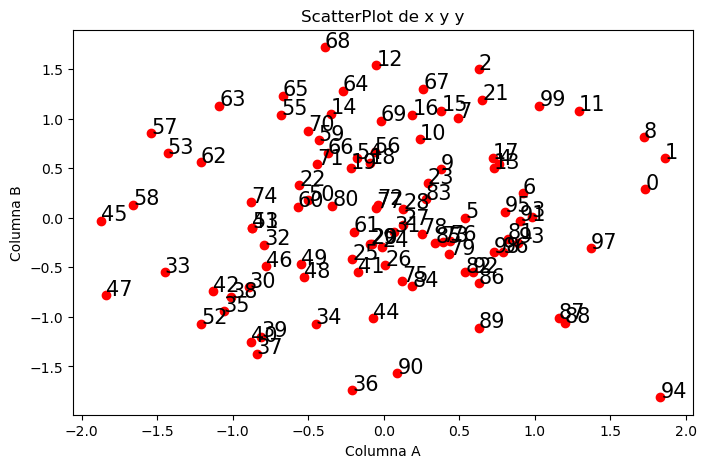

In [5]:
#a = [1,7,4,9,0,2,9]
#b = [1,0,6,6,14,19,17]

#point = ['P1','P2','P3','P4','P5','P6','P7']
data = pd.DataFrame({'a':np.round(a,2), 'b':np.round(b,2)})
#data = data.set_index('Point')
print(data)

#graficamos
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='o')
plt.xlabel('Columna A')
plt.ylabel('Columna B')
plt.title('ScatterPlot de x y y')

for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

Los datos no forman una figura clara.

In [6]:
#calculamos la matriz de Distancias Euclidianas

dist = pd.DataFrame(squareform(pdist(data[["a", "b"]]), "euclidean"), columns=data.index.values, index=data.index.values)
dist

0         1         2         3         4         5         6   \
0   0.000000  0.336155  1.635268  0.800562  1.001699  1.224827  0.810987   
1   0.336155  0.000000  1.524106  1.059481  1.101635  1.449966  1.003045   
2   1.635268  1.524106  0.000000  1.530555  0.968762  1.502698  1.283199   
3   0.800562  1.059481  1.530555  0.000000  0.573847  0.440114  0.247386   
4   1.001699  1.101635  0.968762  0.573847  0.000000  0.583095  0.331210   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.958019  1.189622  1.450000  0.186815  0.481664  0.266833  0.224722   
96  1.137190  1.430874  1.856906  0.407063  0.890505  0.430116  0.613922   
97  0.699714  1.033538  1.955428  0.504480  1.046231  0.886002  0.718401   
98  1.187266  1.476279  1.852701  0.438292  0.890505  0.398246  0.629365   
99  1.093435  0.984784  0.544885  1.121116  0.648845  1.231666  0.886848   

          7         8         9   ...        90        91        92        93  \
0   1.433876  0.520096  1.364734  ...  2.479758  0.889550  1.416051  0.998599   
1   1.430035  0.252389  1.484082  ...  2.800321  1.148260  1.713301  1.289729   
2   0.509608  1.290039  1.040481  ...  3.117130  1.553641  2.050390  1.769209   
3   1.113598  1.089771  0.768375  ...  1.813422  0.089443  0.682422  0.275136   
4   0.542033  0.997246  0.383275  ...  2.213820  0.586941  1.103177  0.800625   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.999300  1.186971  0.601082  ...  1.777920  0.134536  0.645136  0.322800   
96  1.392695  1.486775  0.934719  ...  1.406556  0.338378  0.282843  0.141421   
97  1.586443  1.173414  1.272831  ...  1.796107  0.547083  0.816088  0.483735   
98  1.381014  1.525025  0.910000  ...  1.377679  0.362353  0.244131  0.188680   
99  0.553173  0.760592  0.912195  ...  2.858951  1.167262  1.736663  1.387083   

          94        95        96        97        98        99  
0   2.102380  0.958019  1.137190  0.699714  1.187266  1.093435  
1   2.410187  1.189622  1.430874  1.033538  1.476279  0.984784  
2   3.520810  1.450000  1.856906  1.955428  1.852701  0.544885  
3   2.008706  0.186815  0.407063  0.504480  0.438292  1.121116  
4   2.582131  0.481664  0.890505  1.046231  0.890505  0.648845  
..       ...       ...       ...       ...       ...       ...  
95  2.134900  0.000000  0.410122  0.679559  0.415933  1.094440  
96  1.792540  0.410122  0.000000  0.581378  0.060000  1.499333  
97  1.568949  0.679559  0.581378  0.000000  0.641249  1.479595  
98  1.828004  0.415933  0.060000  0.641249  0.000000  1.510099  
99  3.046900  1.094440  1.499333  1.479595  1.510099  0.000000  

[100 rows x 100 columns]

Vemos que el diametro de la base de datos nunca aumenta de 3. Por lo tanto se acota el parametro r en el complejo simplicial de Rips a 4 y con esto garantizamos que el ultimo complejo simplical será el que conecta a todos. 

In [7]:
#Calculamos la filtración de Rips con un raadio de 20
rips_complex = gudhi.RipsComplex(points=[list(point) for point in zip(a, b)], max_edge_length=3.0)

In [8]:
#Generamos el arbol de complejos simpliciales e imprimmos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
        repr(simplex_tree.num_vertices()) + 'vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension 2 - 154558 simplices - 100vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0

La siguiente función ayuda a realizar una gráfica

In [9]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

### Complejo Simplicial Radio 0.5

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_45330/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


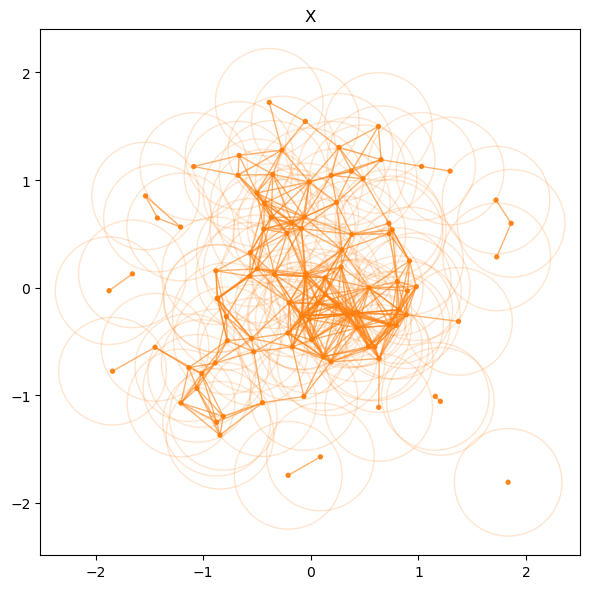

In [10]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=0.5, label="X", maxdim=1)

### Complejo Simplicial Radio 1

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_45330/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


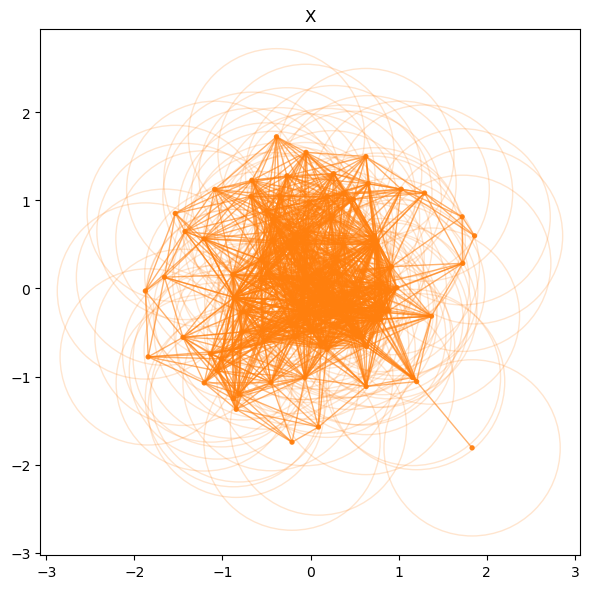

In [11]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=1, label="X", maxdim=1)

### Complejo Simplicial Radio 3

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_45330/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


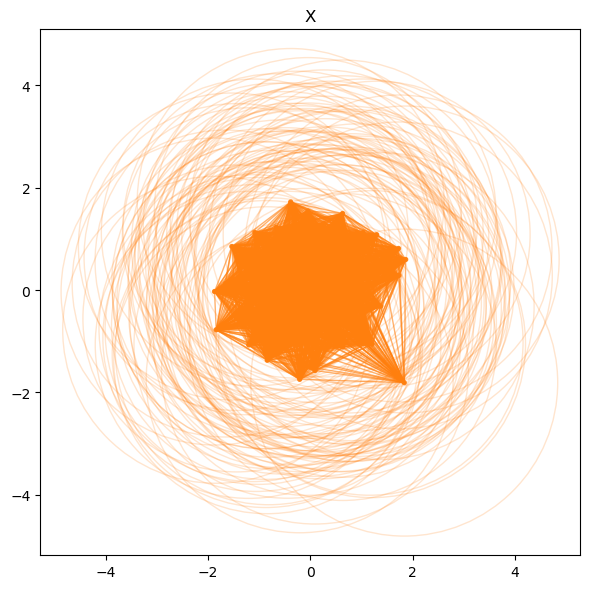

In [12]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=3, label="X", maxdim=1)

### Complejo Simplicial Radio 0.3

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_45330/2475964212.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


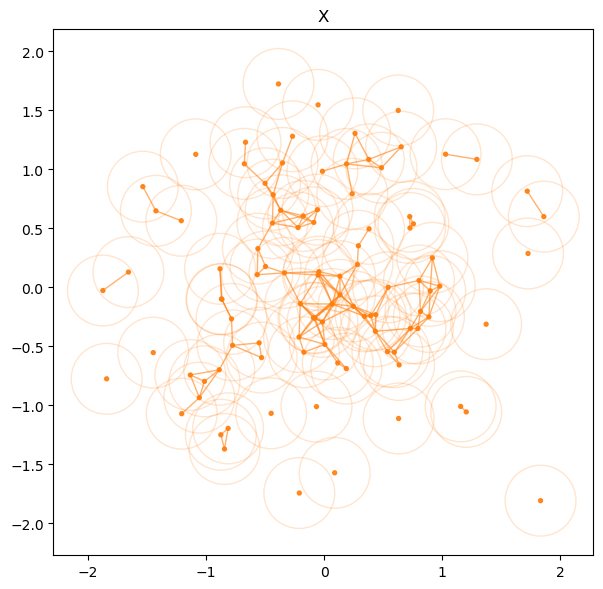

In [18]:
X = np.column_stack((a, b))
plot_rips_complex(X, R=0.3, label="X", maxdim=1)

## Alpha

In [21]:
points = np.column_stack((a, b))

alpha_complex = gudhi.AlphaComplex(points=[list(point) for point in zip(a, b)])

In [22]:
#Generamos el arbol de complejos simpliciales e imprimmos la información
simplex_tree = alpha_complex.create_simplex_tree()
result_str = 'Alpha complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
        repr(simplex_tree.num_vertices()) + 'vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension 2 - 573 simplices - 100vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.0